# ML4NLP1
## Starting Point for Exercise 1, part I

This notebook is supposed to serve as a starting point and/or inspiration when starting exercise 1, part I.

One of the goals of this exercise is to make you acquainted with sklearn and related libraries like pandas and numpy. You will probably need to consult the documentation of those libraries:
- sklearn: [Documentation](https://scikit-learn.org/stable/user_guide.html)
- Pandas: [Documentation](https://pandas.pydata.org/docs/#)
- Numpy: [Documentation](https://numpy.org/doc/)

**Importing files to Google Colab:** If you have never used Colab or never uploaded a file to Colab, quickly skim over an introduction: [Introduction on medium](https://medium.com/@master_yi/importing-datasets-in-google-colab-c816fc654f97).

We're using the second method mentioned in the blogpost: (1) upload the four files `x_train.txt` and `y_train.txt`, `x_test.txt` and `y_test.txt` to a directory in Google Drive and (2) adjust the paths in the second cell to point to your uploaded files.

Then execute the first cell to give Colab permission to access the two files.

In [ ]:
import pandas as pd


import numpy as np
import csv
import re
import string
from collections import defaultdict

In [ ]:
# download dataset
!gdown 1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs # x_train
!gdown 1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6 # x_test
!gdown 1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl # y_train
!gdown 1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X # y_test

Downloading...
From: https://drive.google.com/uc?id=1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs
To: /content/x_train.txt
100% 64.1M/64.1M [00:00<00:00, 87.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6
To: /content/x_test.txt
100% 65.2M/65.2M [00:00<00:00, 118MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl
To: /content/y_train.txt
100% 480k/480k [00:00<00:00, 6.68MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X
To: /content/y_test.txt
100% 480k/480k [00:00<00:00, 8.78MB/s]


In [ ]:
with open(f'x_train.txt') as f:
    x_train = f.read().splitlines()
with open(f'y_train.txt') as f:
    y_train = f.read().splitlines()
with open(f'x_test.txt') as f:
    x_test = f.read().splitlines()
with open(f'y_test.txt') as f:
    y_test = f.read().splitlines()

In [ ]:
# combine x_train and y_train into one dataframe
train_df = pd.DataFrame({'text': x_train, 'label': y_train})
# write train_df to csv with tab as separator
train_df.to_csv('train_df.csv', index=False, sep='\t')
# comibne x_test and y_test into one dataframe
test_df = pd.DataFrame({'text': x_test, 'label': y_test})

In [ ]:
train_df.head()

,text,label
0,Klement Gottwaldi surnukeha palsameeriti ning ...,est
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",swe
2,भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षे...,mai
3,"Après lo cort periòde d'establiment a Basilèa,...",oci
4,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...,tha


In [ ]:
# get list of all labels
labels = train_df['label'].unique().tolist()
print(labels)

['est', 'swe', 'mai', 'oci', 'tha', 'orm', 'lim', 'guj', 'pnb', 'zea', 'krc', 'hat', 'pcd', 'tam', 'vie', 'pan', 'szl', 'ckb', 'fur', 'wuu', 'arz', 'ton', 'eus', 'map-bms', 'glk', 'nld', 'bod', 'jpn', 'arg', 'srd', 'ext', 'sin', 'kur', 'che', 'tuk', 'pag', 'tur', 'als', 'koi', 'lat', 'urd', 'tat', 'bxr', 'ind', 'kir', 'zh-yue', 'dan', 'por', 'fra', 'ori', 'nob', 'jbo', 'kok', 'amh', 'khm', 'hbs', 'slv', 'bos', 'tet', 'zho', 'kor', 'sah', 'rup', 'ast', 'wol', 'bul', 'gla', 'msa', 'crh', 'lug', 'sun', 'bre', 'mon', 'nep', 'ibo', 'cdo', 'asm', 'grn', 'hin', 'mar', 'lin', 'ile', 'lmo', 'mya', 'ilo', 'csb', 'tyv', 'gle', 'nan', 'jam', 'scn', 'be-tarask', 'diq', 'cor', 'fao', 'mlg', 'yid', 'sme', 'spa', 'kbd', 'udm', 'isl', 'ksh', 'san', 'aze', 'nap', 'dsb', 'pam', 'cym', 'srp', 'stq', 'tel', 'swa', 'vls', 'mzn', 'bel', 'lad', 'ina', 'ava', 'lao', 'min', 'ita', 'nds-nl', 'oss', 'kab', 'pus', 'fin', 'snd', 'kaa', 'fas', 'cbk', 'cat', 'nci', 'mhr', 'roa-tara', 'frp', 'ron', 'new', 'bar', 'ltg'

In [ ]:
# T: Have a quick peek at the training data, looking at a couple of texts from different languages.
# Do you notice anything that might be challenging for the classification?

# 1. punctuations, different languages use different punctuations
# 2. language mistakes/errors within one language, needs normalization
# 3. spaces, some languages use space between each word, some don't
# 4. umlauts, some languages share similar umlauts
# 5. upper and lower case, some languages don't have case differences
# 6. there are mixed-language inputs in some lines

In [ ]:
# T: How many instances per label are there in the training and test set? Do you think this is a balanced dataset?
# Do you think the train/test split is appropriate? If not, please rearrange the data in a more appropriate way.

In [ ]:
train_label_counts = train_df['label'].value_counts()
print("Training Set Label Counts:")
print(train_label_counts)

test_label_counts = test_df['label'].value_counts()
print("\nTesting Set Label Counts:")
print(test_label_counts)

# There are 500 instances for each label in both training and test set. This can be seen as a balanced dataset.
# The train/test split is not appropriate, since it's a 50-50 split with 117,500 lines for both training and test data.
# The better idea would be have a 80-20 split, having more training data.

Training Set Label Counts:
est    500
eng    500
vep    500
sgs    500
uig    500
      ... 
lmo    500
mya    500
ilo    500
csb    500
ltz    500
Name: label, Length: 235, dtype: int64

Testing Set Label Counts:
mwl    500
uig    500
tat    500
nno    500
new    500
      ... 
frp    500
krc    500
mlg    500
msa    500
ckb    500
Name: label, Length: 235, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Combine train and test for initial merge
combined_df = pd.concat([train_df, test_df])

# Split combined_df into 80% training and 20% testing while stratifying by label
train_df, test_df = train_test_split(combined_df, test_size=0.2, random_state=42, stratify=combined_df['label'])

train_label_counts = train_df['label'].value_counts()
print("Training Set Label Counts:")
print(train_label_counts)

test_label_counts = test_df['label'].value_counts()
print("\nTesting Set Label Counts:")
print(test_label_counts)

Training Set Label Counts:
pdc    800
slv    800
tgl    800
kaa    800
myv    800
      ... 
zho    800
vro    800
afr    800
tur    800
lat    800
Name: label, Length: 235, dtype: int64

Testing Set Label Counts:
ckb    200
kom    200
fry    200
ltz    200
kat    200
      ... 
ido    200
wuu    200
dan    200
arz    200
epo    200
Name: label, Length: 235, dtype: int64


In [ ]:
# T: Get a subset of the train/test data that includes English, German, Dutch, Danish, Swedish and Norwegian,
# plus 20 additional languages of your choice (the labels can be found in the file labels.csv)

In [ ]:
selected_labels = ['eng', 'deu', 'nld', 'dan', 'swe', 'nno', 'ace', 'afr', 'als', 'amh', 'ang', 'ara', 'arg', 'arz', 'asm',
                   'ast', 'ava', 'aym', 'azb', 'aze', 'bak', 'bar', 'bcl', 'kom', 'bel', 'jpn']

train_subset = train_df[train_df['label'].isin(selected_labels)]
test_subset = test_df[test_df['label'].isin(selected_labels)]

# Define X_train, y_train, X_test, y_test
X_train = train_subset['text']
y_train = train_subset['label']
X_test = test_subset['text']
y_test = test_subset['label']

In [ ]:
# T: With the following code, we wanted to encode the labels, however, our cat was walking on the keyboard and some of it got changed. Can you fix it?
from sklearn.preprocessing import LabelEncoder

le_fitted = LabelEncoder().fit(y_train)
y_train, y_test = le_fitted.transform(y_train), le_fitted.transform(y_test)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Include average sentence length as an additional linguistics feature
class AvgSentenceLengthExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, max_iter=10):
        self.max_iter = max_iter

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        avg_lengths = [self.avg_sentence_length(sent) for sent in X]
        return [[avg] for avg in avg_lengths]

    def avg_sentence_length(self, text):
        sentences = nltk.sent_tokenize(text)
        total_length = sum(len(nltk.word_tokenize(sent)) for sent in sentences)
        return total_length / len(sentences) if len(sentences) > 0 else 0

    def get_feature_names_out(self, input_features=None):
        return ['avg_length']

# Define a pipeline
text_clf = Pipeline([
    ('features', FeatureUnion([
        ('text', Pipeline([
            ('vect', CountVectorizer()),
            ('tfidf', TfidfTransformer())
        ])),
        ('avg_length', AvgSentenceLengthExtractor())
    ])),
    ('clf', LogisticRegression())
])

In [ ]:
text_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('text',
                                                 Pipeline(steps=[('vect',
                                                                  CountVectorizer()),
                                                                 ('tfidf',
                                                                  TfidfTransformer())])),
                                                ('avg_length',
                                                 AvgSentenceLengthExtractor())])),
                ('clf', LogisticRegression())])

In [ ]:
test_accuracy = text_clf.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.8876923076923077


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a simplified parameter grid for GridSearchCV
## Here we took shortcuts on the optimization methods with max_iter being a ridiculously low number, but after multiple times of optimization,
## we have found the best combination as indicated in the best_model.

# param_grid = {
#     'features__text__vect__ngram_range': [(1, 1), (1, 2), (2, 2)],  # Range for n-grams
#     'clf__penalty': ['l1', 'l2'],  # Regularization penalty
#     'clf__solver': ['liblinear', 'saga', 'newton-cg'],  # Solver for regularization
#     'clf__max_iter': [10]  # Max number of iterations (ridiculously low)
# }

param_grid = {
    'features__text__vect__ngram_range': [(1, 1)],  # Range for n-grams
    'clf__penalty': ['l2'],  # Regularization penalty
    'clf__solver': ['saga'],  # Solver for regularization
    'clf__max_iter': [10]  # Max number of iterations (ridiculously low)
}

gs_clf = GridSearchCV(text_clf, param_grid, cv=5, verbose=1)
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('text',
                                                                        Pipeline(steps=[('vect',
                                                                                         CountVectorizer()),
                                                                                        ('tfidf',
                                                                                         TfidfTransformer())])),
                                                                       ('avg_length',
                                                                        AvgSentenceLengthExtractor())])),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__max_iter': [10], 'clf__penalty': ['l2'],
                         'clf__solver': ['saga'],
                         'features__text__vect__ngram_range': [(1, 1)]},
             verbose=1)

In [ ]:
clf_df = pd.DataFrame.from_dict(gs_clf.cv_results_)
clf_df.sort_values(by=["rank_test_score"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_iter,param_clf__penalty,param_clf__solver,param_features__text__vect__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,18.258417,3.038598,3.398876,0.843134,10,l2,saga,"(1, 1)","{'clf__max_iter': 10, 'clf__penalty': 'l2', 'c...",0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.0,1


In [ ]:
# Define the best model
best_model = Pipeline([
    ('features', FeatureUnion([
        ('text', Pipeline([
            ('vect', CountVectorizer(ngram_range=(1, 1))),
            ('tfidf', TfidfTransformer())
        ])),
        ('avg_length', AvgSentenceLengthExtractor())
    ])),
    ('clf', LogisticRegression(penalty='l2', solver='newton-cg'))
])

best_model.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('text',
                                                 Pipeline(steps=[('vect',
                                                                  CountVectorizer()),
                                                                 ('tfidf',
                                                                  TfidfTransformer())])),
                                                ('avg_length',
                                                 AvgSentenceLengthExtractor())])),
                ('clf', LogisticRegression(solver='newton-cg'))])

In [ ]:
test_accuracy = best_model.score(X_test, y_test)
test_accuracy

0.9584615384615385

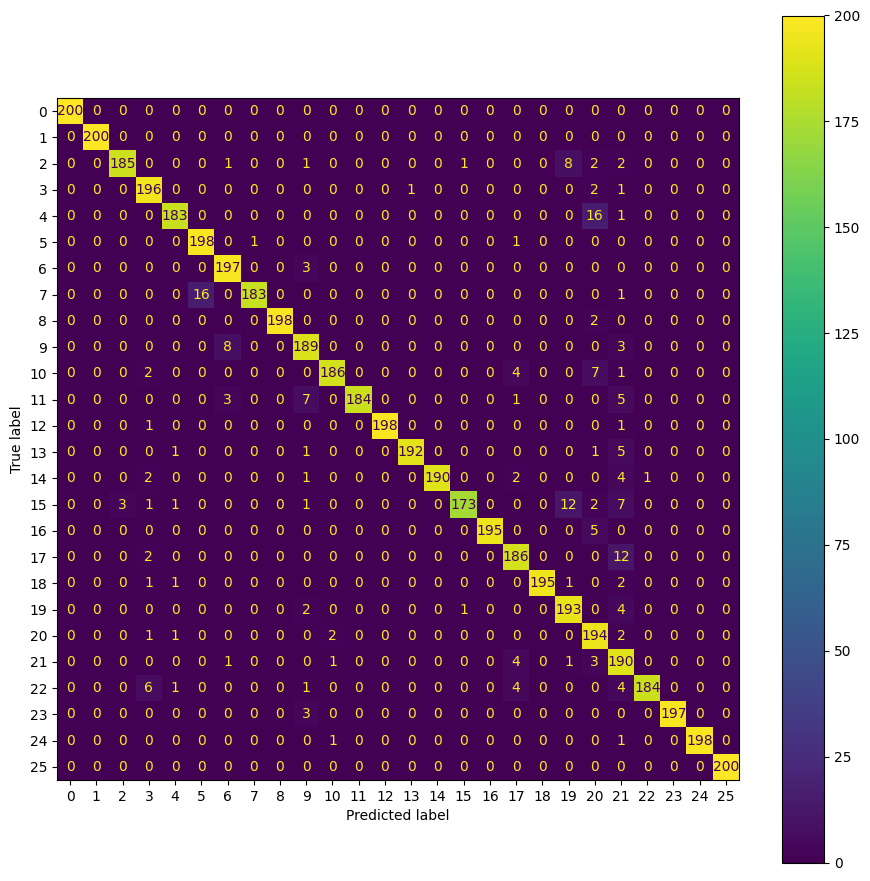

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predictions = best_model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=best_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model.classes_)
# Set the size of the plot
fig, ax = plt.subplots(figsize=(11, 11))
disp.plot(ax=ax)
plt.show()

In [ ]:
!pip install eli5

In [ ]:
import eli5
import numpy as np

languages = ['eng', 'swe', 'nno', 'jpn']

clf = best_model.named_steps['clf']
vect = best_model.named_steps['features'].transformer_list[0][1].named_steps['vect']
avg = best_model.named_steps['features'].transformer_list[1][1]
feature_names_1 = vect.get_feature_names_out()
feature_names_2 = avg.get_feature_names_out()

# Merge the two feature sets
feature_names = np.concatenate((feature_names_1, feature_names_2))

eli5.show_weights(clf, top=10, feature_names=feature_names,
                  targets=le_fitted.transform(languages),
                  target_names=le_fitted.classes_)

In [ ]:
# Choose the two languages for which the classifier worked best
selected_languages = ['ace', 'swe']

# Filter data for the selected language
train_lang_subset = train_df[train_df['label'].isin(selected_languages)]
test_lang_subset = test_df[test_df['label'].isin(selected_languages)]

# Define training and testing sets
X_train_lang = train_lang_subset['text']
y_train_lang = train_lang_subset['label']
X_test_lang = test_lang_subset['text']
y_test_lang = test_lang_subset['label']

# Train and evaluate the model with different character limits
for char_limit in [None, 500, 100, 20]:
    if char_limit is None:
        X_train_lang_subset = X_train_lang  # All characters
    else:
        X_train_lang_subset = X_train_lang.apply(lambda x: x[:char_limit])

    best_model.fit(X_train_lang_subset, y_train_lang)

    # Make predictions on the test set
    y_pred = best_model.predict(X_test_lang)

    # Evaluate and print the accuracy
    accuracy = best_model.score(X_test_lang, y_test_lang)
    print(f"\nCharacter Limit: {char_limit}")
    print(f"Accuracy: {accuracy}")



Character Limit: None
Accuracy: 1.0

Character Limit: 500
Accuracy: 1.0

Character Limit: 100
Accuracy: 0.9975

Character Limit: 20
Accuracy: 0.715
